# Imports

In [8]:
import pynncml as pnc 
from matplotlib import pyplot as plt

# Load OpenCML Dataset

In [9]:
open_cml_dataset = pnc.read_open_cml_dataset('../dataset/open_cml.p') #  read OpenCML dataset

# Select Link and Plot link data

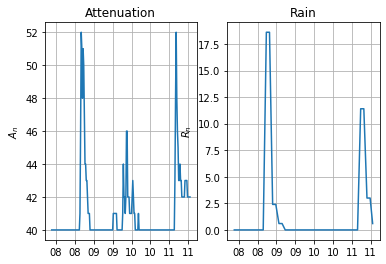

In [10]:
link_index = 14
link_data = open_cml_dataset[link_index] # select a link
link_min_max=link_data.create_min_max_link(300)
link_data.plot() # plot link data
plt.show()

# Run rain estimation using constant baseline
 

In [11]:
tsc = pnc.rain_estimation.two_step_network(1, pnc.neural_networks.DNNType.GRU) # init classification model
res,_ = tsc(link_min_max.as_tensor(constant_tsl=10),link_data.meta_data.as_tensor(),tsc.init_state()) # run classification method
rain=res[0,:,0]
wd=res[0,:,1]

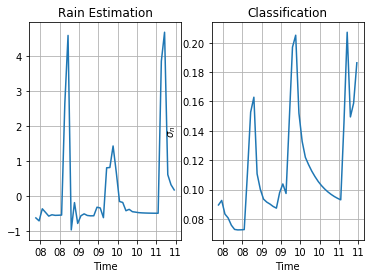

In [12]:
plt.subplot(1, 2, 1)
plt.plot(link_min_max.time(), rain.detach().numpy().flatten())
plt.title('Rain Estimation')
plt.xlabel('Time')
pnc.change_x_axis_time_format('%H')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(link_min_max.time(), wd.detach().numpy().flatten())
plt.xlabel('Time')
plt.title('Classification')
pnc.change_x_axis_time_format('%H')
plt.ylabel(r'$\sigma_n$')
plt.grid()
plt.show()

# References
[1] Habi, Hai Victor. Rain Detection and Estimation Using Recurrent Neural Network and Commercial Microwave Links. M.Sc. Thesis, Tel Aviv University.